In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})


In [2]:
students = generate_students(200)
sales = generate_daily_sales(90)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###### Using sales, draw a lineplot of date vs sales

<Axes: xlabel='date', ylabel='sales'>

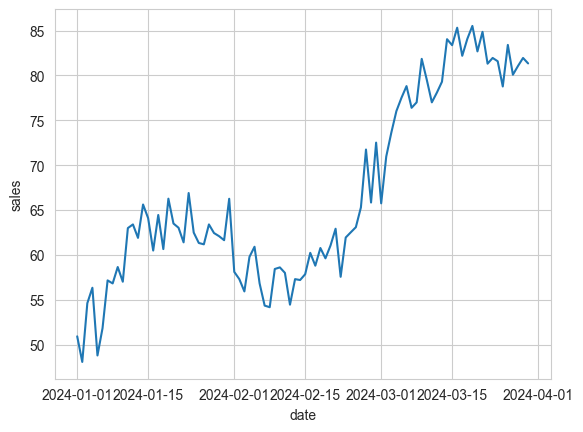

In [5]:
sns.lineplot(data=sales,x='date',y='sales')

###### From students, plot hours_studied vs marks and color by gender

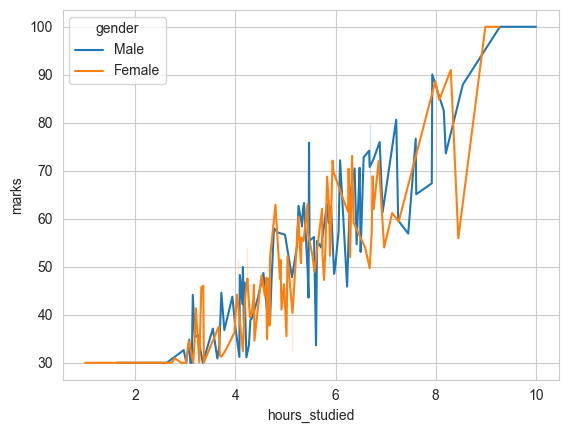

In [10]:
sns.lineplot(data=students,x='hours_studied',y='marks',hue='gender')
plt.show()

###### Create a grid of scatterplots (hours_studied vs marks) faceted by subject

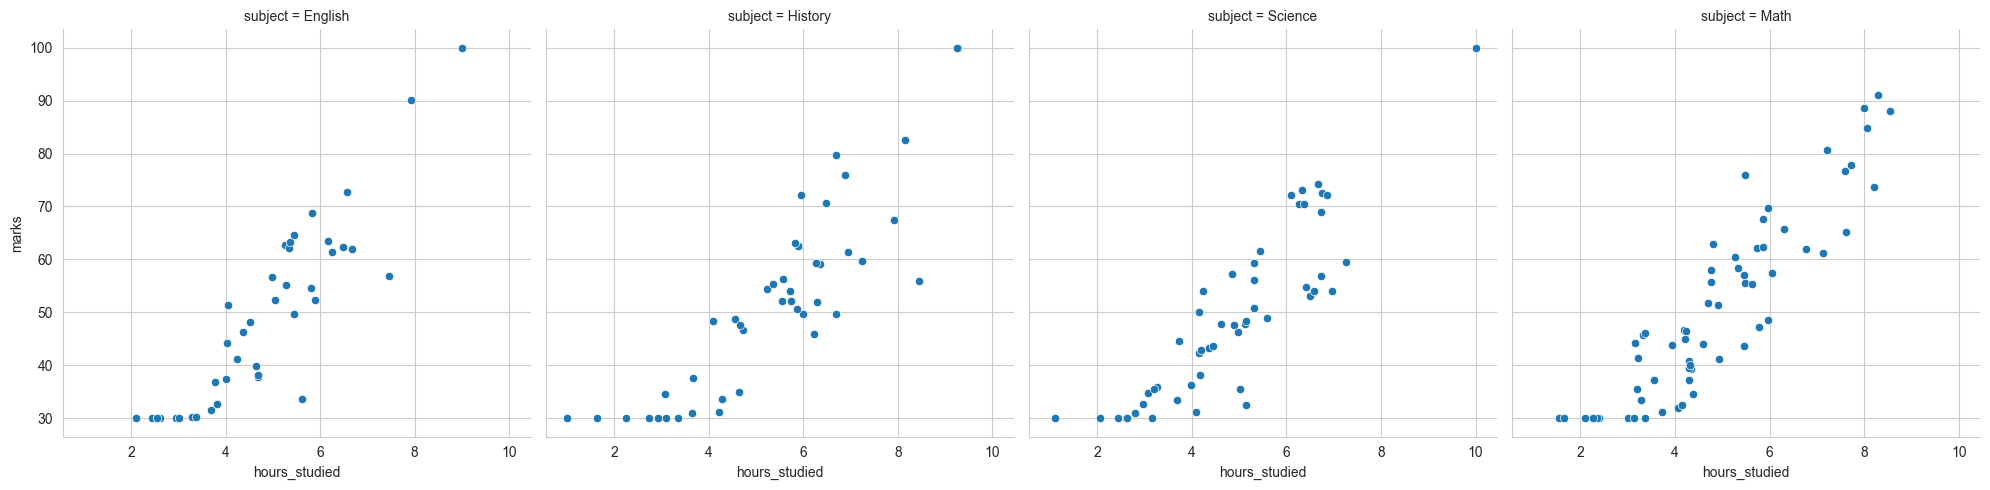

In [13]:
sns.relplot(kind='scatter',data=students,x='hours_studied',y='marks',col='subject')
plt.show()

###### Plot a histogram of marks with a KDE overlay

<Axes: xlabel='marks', ylabel='Count'>

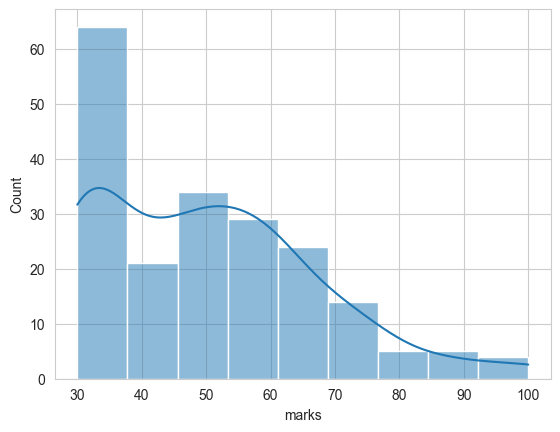

In [21]:
sns.histplot(data=students,x='marks',kde=True)

###### Show the KDE curve for hours_studied

<Axes: xlabel='hours_studied', ylabel='Density'>

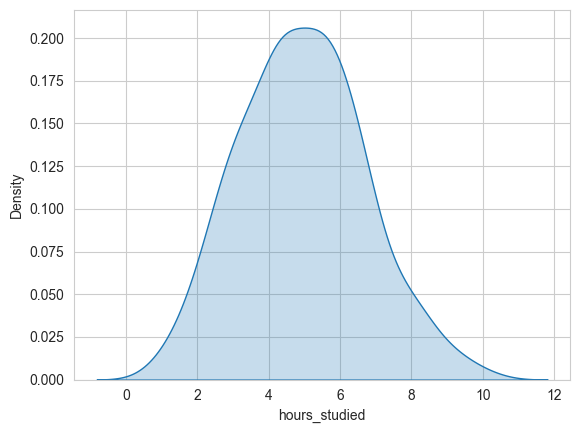

In [23]:
sns.kdeplot(data=students,x='hours_studied',fill=True)

###### Display the count of records per subject

<Axes: xlabel='subject', ylabel='count'>

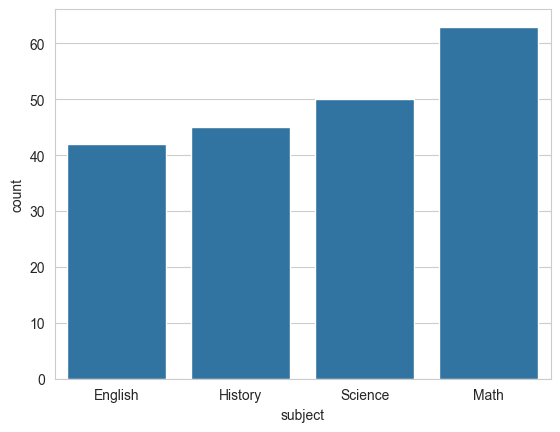

In [25]:
sns.countplot(data=students,x='subject')

###### Draw a regression line for hours_studied and marks

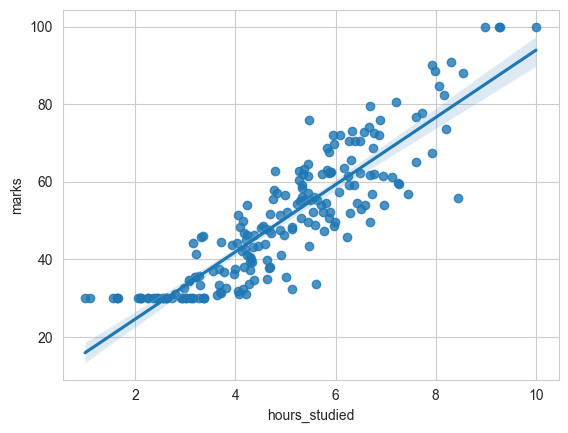

In [27]:
sns.regplot(data=students,x='hours_studied',y='marks')
plt.show()

###### Create a pairplot and a jointplot for students' dataset

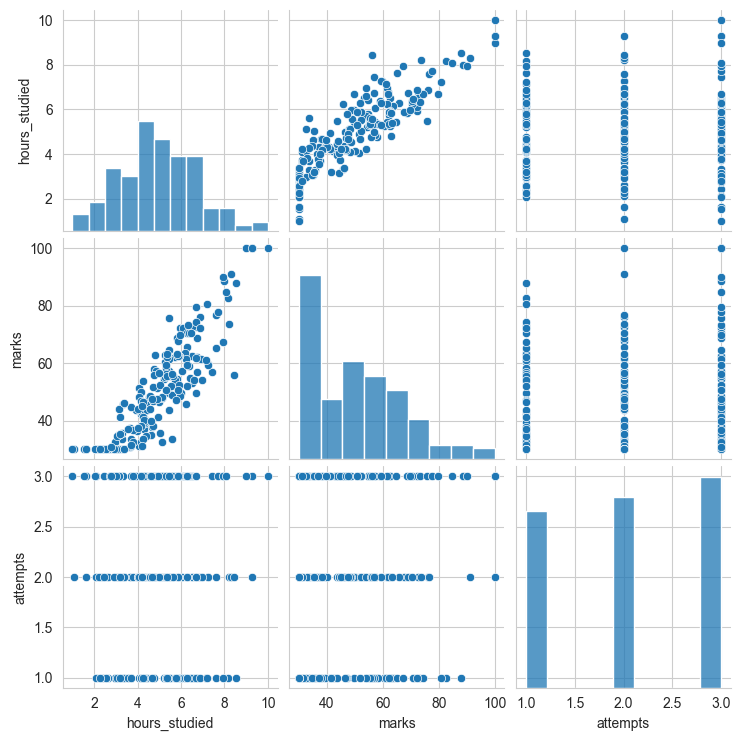

In [28]:
sns.pairplot(data=students)
plt.show()

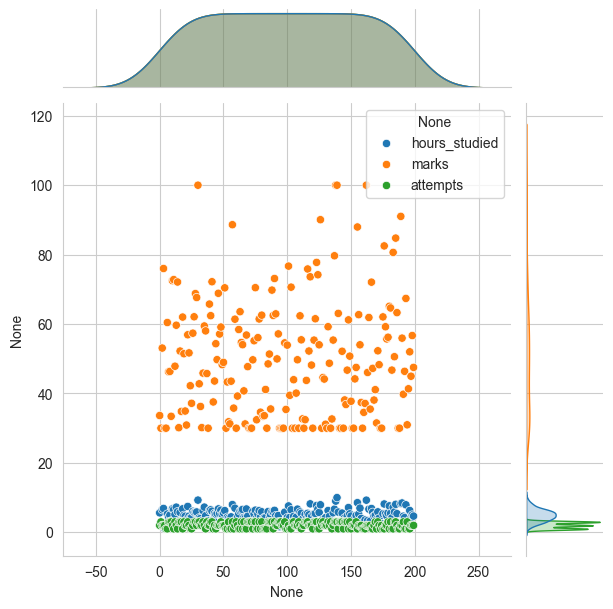

In [29]:
sns.jointplot(data=students)
plt.show()

###### Make a scatter plot of hours_studied vs marks using Plotly, colored by gender

In [30]:
fig = px.scatter(data_frame=students,x='hours_studied',y='marks',color='gender')
fig.show()

###### Draw a line chart of sales over date and a histogram of marks using Plotly

In [33]:
fig = px.line(data_frame=sales,x='date',y='sales')
fig.show()

In [34]:
fig = px.histogram(data_frame=students,x='marks')
fig.show()